Model Prediction comparsion on Sonar Dataset before and after Dropout Regularization

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [11]:
# This is a dataset that describes sonar chirp returns bouncing off different services. 
# The 60 input variables are the strength of the returns at different angles. 
# It is a binary classification problem that requires a model to differentiate rocks from metal cylinders.

# Data Loading and Preprocessing
df = pd.read_csv('sonar_dataset.csv', header=None)
df[60] = df[60].map({'R':0, 'M':1})  # Encoding labels: R=0 (Rock), M=1 (Metal)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0


In [39]:
# Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(60, axis=1), df[60], test_size=0.25, random_state=1)
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
67,0.0368,0.0403,0.0317,0.0293,0.0820,0.1342,0.1161,0.0663,0.0155,0.0506,...,0.0058,0.0091,0.0160,0.0160,0.0081,0.0070,0.0135,0.0067,0.0078,0.0068
14,0.0124,0.0433,0.0604,0.0449,0.0597,0.0355,0.0531,0.0343,0.1052,0.2120,...,0.0078,0.0083,0.0057,0.0174,0.0188,0.0054,0.0114,0.0196,0.0147,0.0062
164,0.0163,0.0198,0.0202,0.0386,0.0752,0.1444,0.1487,0.1484,0.2442,0.2822,...,0.0027,0.0077,0.0026,0.0031,0.0083,0.0020,0.0084,0.0108,0.0083,0.0033
179,0.0394,0.0420,0.0446,0.0551,0.0597,0.1416,0.0956,0.0802,0.1618,0.2558,...,0.0118,0.0146,0.0040,0.0114,0.0032,0.0062,0.0101,0.0068,0.0053,0.0087
19,0.0126,0.0149,0.0641,0.1732,0.2565,0.2559,0.2947,0.4110,0.4983,0.5920,...,0.0153,0.0092,0.0035,0.0098,0.0121,0.0006,0.0181,0.0094,0.0116,0.0063


In [40]:
# Model without dropout layer
model = keras.Sequential([
    keras.layers.Dense(60, activation='relu', input_shape=(60,)),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6779 - accuracy: 0.5833
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6332 - accuracy: 0.6346
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5887 - accuracy: 0.7500
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.7628
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5103 - accuracy: 0.7564
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4547 - accuracy: 0.8269
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4356 - accuracy: 0.8077
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4193 - accuracy: 0.8141
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3824 - accuracy: 0.8269
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3411 - accuracy: 0.8910
Epoch 11/

In [41]:
model.evaluate(x_test, y_test)
# training accuracy is very high but testing accuracy is low, indicating overfitting.

2/2 [==============================] - 0s 1ms/step - loss: 0.9828 - accuracy: 0.7692


[0.9827645421028137, 0.7692307829856873]

              precision    recall  f1-score   support

           0       0.84      0.64      0.73        25
           1       0.73      0.89      0.80        27

    accuracy                           0.77        52
   macro avg       0.78      0.76      0.76        52
weighted avg       0.78      0.77      0.77        52



Text(0.5, 1.0, 'Confusion Matrix without Dropout')

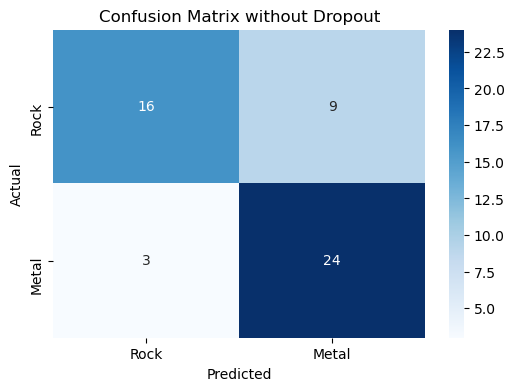

In [42]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Rock', 'Metal'], yticklabels=['Rock', 'Metal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix without Dropout')

In [43]:
# Model with dropout_layer
model_d = keras.Sequential([
    keras.layers.Dense(60, activation='relu', input_shape=(60,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])
model_d.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_d.fit(x_train, y_train, epochs=100, batch_size=5)

Epoch 1/100
32/32 [==============================] - 0s 7ms/step - loss: 0.7020 - accuracy: 0.5321
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7028 - accuracy: 0.5577
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7006 - accuracy: 0.5256
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5064
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5256
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6728 - accuracy: 0.5385
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.5385
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5449
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6661 - accuracy: 0.5641
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5385
Epoch 11/

In [45]:
model_d.evaluate(x_test, y_test)
# training accuracy is lower but testing accuracy has improved, indicating reduced overfitting.

2/2 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.8462


[0.497601717710495, 0.8461538553237915]

              precision    recall  f1-score   support

           0       0.95      0.72      0.82        25
           1       0.79      0.96      0.87        27

    accuracy                           0.85        52
   macro avg       0.87      0.84      0.84        52
weighted avg       0.86      0.85      0.84        52



Text(0.5, 1.0, 'Confusion Matrix with Dropout')

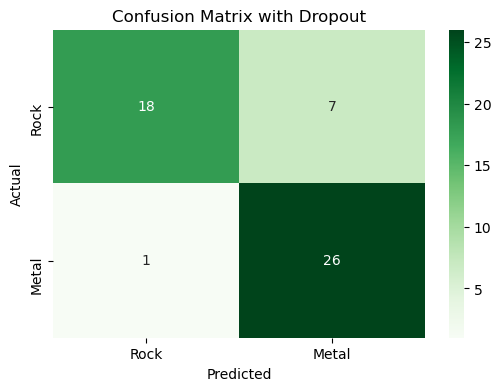

In [47]:
# confusion Matrix and Classification Report
y_pred_d = (model_d.predict(x_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_d))
cm_d = confusion_matrix(y_test, y_pred_d)
plt.figure(figsize=(6,4))
sns.heatmap(cm_d, annot=True, fmt='d', cmap='Greens', xticklabels=['Rock', 'Metal'], yticklabels=['Rock', 'Metal'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with Dropout')